# Light Gradient Boosting Machine

In [1]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 18.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [3]:
wine_data= load_wine()
df = pd.DataFrame(data = wine_data.data, columns = wine_data.feature_names)
df["target"] = wine_data.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
x = df.drop("target", axis=1)
y = df["target"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [7]:
type(x_train)

pandas.core.frame.DataFrame

In [9]:
# converts pandas dataframe to lightgbm
train_data = lgb.Dataset(x_train, label = y_train) #
test_data = lgb.Dataset(x_test, label = y_test, reference = train_data)

In [10]:
type(train_data)

lightgbm.basic.Dataset

In [11]:
params = {
    'objective':'multiclass', # 3 type of problem: regression, binary(two class) and multiclass(many class)
    'num_class':3,   # 3 classes in the wine datasets output
    'metric':'multi_logloss', 
    'boosting_type':'gbdt', # gradient boosting decision tree
    'num_leaves':31, #
    'learning_rate': 0.05,
    'feature_fraction':0.9
}

In [13]:
model = lgb.train(params, train_data, valid_sets=[test_data],num_boost_round = 100 ) #no. of times boosting algorithm will run [no. of DT made]
# early_stopping = 10 : if model see's no increase in accuracy running 10 rounds then model will stop trianing

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [16]:
y_pred = model.predict(x_test, num_iteration = model.best_iteration) # it finds best model
y_pred

array([[9.97945443e-01, 1.02764400e-03, 1.02691279e-03],
       [9.96286027e-01, 1.56062280e-03, 2.15335037e-03],
       [8.92779663e-03, 1.67019991e-02, 9.74370204e-01],
       [9.89477355e-01, 6.72425250e-03, 3.79839275e-03],
       [7.81129900e-03, 9.86269388e-01, 5.91931336e-03],
       [9.93700922e-01, 3.39741656e-03, 2.90166147e-03],
       [4.40713440e-04, 9.99151191e-01, 4.08095356e-04],
       [2.75670075e-03, 6.56555950e-04, 9.96586743e-01],
       [2.33508856e-03, 9.97323249e-01, 3.41662011e-04],
       [2.62324958e-02, 5.85875634e-03, 9.67908748e-01],
       [9.46882301e-01, 4.94929654e-02, 3.62473321e-03],
       [7.17351511e-02, 3.52738342e-01, 5.75526507e-01],
       [9.93712056e-01, 4.70421008e-03, 1.58373406e-03],
       [1.37632122e-03, 3.85530339e-01, 6.13093340e-01],
       [9.98734560e-01, 6.91316368e-04, 5.74123817e-04],
       [1.56453210e-03, 9.97972244e-01, 4.63223708e-04],
       [4.83119688e-04, 9.99210208e-01, 3.06672037e-04],
       [4.34983567e-04, 9.99255

In [17]:
y_pred_class = [list(x).index(max(x)) for x in y_pred] # finds the value of class from array(numpy format)

In [18]:
y_pred_class

[0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2]

In [19]:
print("Accuracy: ",accuracy_score(y_test,y_pred_class))

Accuracy:  0.9814814814814815


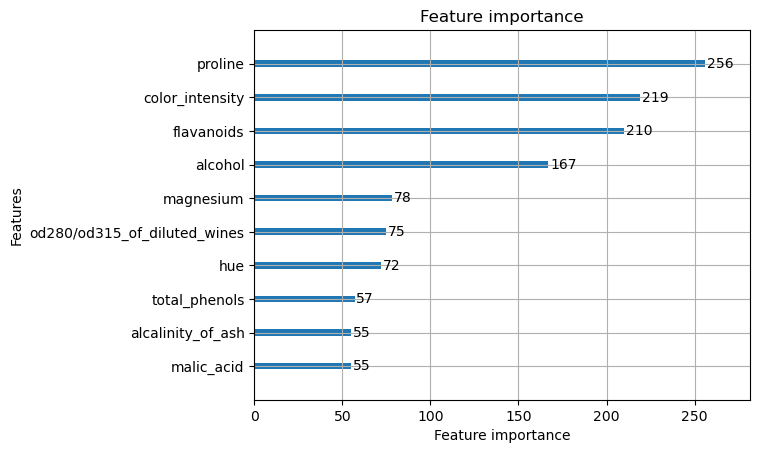

In [21]:
lgb.plot_importance(model, max_num_features=10)
plt.show()

# Parameters
